In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn import linear_model

<h2> Exercise 2</h2>

Number of samples: 100
Test sample's features:
 [[ 14.98836957]
 [  3.68762608]
 [ 17.95181208]
 [ 13.93820578]
 [ 17.63587021]
 [ 23.64575835]
 [ 15.17711225]
 [  8.53037434]
 [ 12.8126393 ]
 [ 23.36500876]
 [ 10.71167994]
 [  4.71890339]
 [ 20.33169523]
 [  4.54927709]
 [ 12.36124126]]
Predicted labels:
 [ 5.65311868  2.77636581  6.40750194  5.38578568  6.32707478  7.85697084
  5.70116561  4.00915107  5.09925792  7.78550234  4.56443109  3.03889101
  7.01333249  2.99571041  4.98434862]
Root mean squared error (RMSE): 2.558023298094877


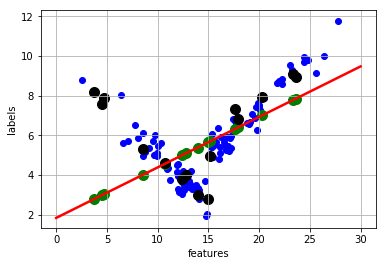

In [3]:
# Reading and visualizing the data
features = np.loadtxt('data/ex2_features_regression.txt')[:,np.newaxis]
labels = np.loadtxt('data/ex2_labels_regression.txt')
nsamples = features.size
print ('Number of samples: {}'.format(nsamples))

# Plotting
plt.scatter(features, labels, color='b')
plt.grid('on')
plt.xlabel('features')
plt.ylabel('labels')

# We create an object that can do linear regression
regr_ex = linear_model.LinearRegression()
# We use the data to estimate its parameters with the fit function
regr_ex.fit(features, labels)

# Plotting
x = np.asarray([[-0], [30]])
plt.plot(x, regr_ex.predict(x), 'r', linewidth=2.5)

# Reading features of the test samples and predicting with the learned model: 
test_features = np.loadtxt('data/ex2_test_features_regression.txt')[:,np.newaxis]
print("Test sample's features:\n {}".format(test_features))
test_predict = regr_ex.predict(test_features)
print("Predicted labels:\n {}".format(test_predict))

# Reading true labels and computing RMSE
test_labels = np.loadtxt('data/ex2_test_labels_regression.txt')
root_mean_squared_error = np.sqrt(np.mean((test_labels - test_predict)**2))
print("Root mean squared error (RMSE): {}".format(root_mean_squared_error))

# Plotting
plt.scatter(test_features, test_predict, color='g', s=100)
plt.scatter(test_features, test_labels, color='k', s=100)
plt.show() # showing everything on the screen

<h2> Exercise 3 </h2>

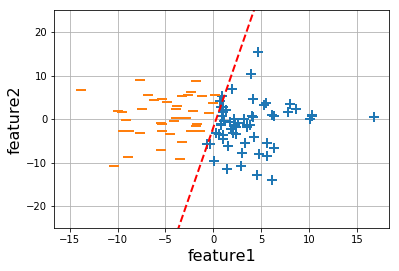

Classification accuracy: 0.98
False positive rate: 0.02
False negative rate: 0.0


In [2]:
# Reading data
features = np.loadtxt('data/ex3_features_classification.txt')
labels = np.loadtxt('data/ex3_labels_classification.txt')
# We create an object that can do logistic regression
clas_ex = linear_model.LogisticRegression()
# We use the data to estimate its parameters with the fit function
clas_ex.fit(features, labels)

# Plotting
pos_rows = labels > 0
neg_rows = labels <= 0
plt.plot(features[pos_rows,0],features[pos_rows,1],'+',markersize=10,mew=2)
plt.plot(features[neg_rows,0],features[neg_rows,1],'_',markersize=10,mew=2)
plt.grid('on')
plt.xlabel('feature1',fontsize=16), plt.ylabel('feature2',fontsize=16)

x = np.asarray([[-15], [15]])
# coefficients of the logistic regression are saved in the "clas" object and can be constructed into a line as
m = clas_ex.coef_[0,0] / clas_ex.coef_[0,1]
b = clas_ex.intercept_ / clas_ex.coef_[0,1]
plt.plot(x[:,0], b - m*x[:,0], 'r--', linewidth=2)
plt.ylim(-25,25)
plt.show()

# Reading test sample's features
test_features = np.loadtxt('data/ex3_test_features_classification.txt')
test_predict = clas_ex.predict(test_features)

# Computing accuracy measures: 
test_labels = np.loadtxt('data/ex3_test_labels_classification.txt')
clas_accuracy = np.sum(test_predict == test_labels) / test_features.shape[0]
clas_fps = np.sum(test_predict > test_labels) / test_features.shape[0]
clas_fns = np.sum(test_predict < test_labels) / test_features.shape[0]
print('Classification accuracy: {}'.format(clas_accuracy))
print('False positive rate: {}'.format(clas_fps))
print('False negative rate: {}'.format(clas_fns))